In [246]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [247]:
#Part (a) Least Squares
# Generate data from csv files
x_train = np.genfromtxt('X_train.csv', delimiter = ',')
x_train = x_train[:, 0:6]
y_train = np.genfromtxt('y_train.csv')
mean_y = np.mean(y_train)
y_train_norm = y_train - mean_y
x_train_norm = x_train - x_train.mean(0)
print(x_train_norm.mean(0))



[  3.93336157e-17   6.34413157e-18   4.94842262e-17  -2.18872539e-17
   6.97854473e-18   6.34413157e-18]


In [248]:
# Single value decomposition
U, s, V = np.linalg.svd(x_train_norm, full_matrices = True)
print(s)


[ 37.94442426  16.91853469  15.41965813   6.70613389   4.68937687
   3.56229487]


In [249]:
# Function to calculate ridge regression coefficient
def ridgeCalc(X, y, lamb):
    xtx = np.dot(X.T,X)
    xty = np.dot(X.T, y)
    wRRlambda = lamb * np.identity(np.shape(xtx)[0])
    wRRInverse = np.linalg.inv(xtx + wRRlambda)
    wRR = np.dot(wRRInverse, xty)
    wRR = np.append(wRR, np.mean(y))
    return wRR



In [250]:
# Array of all ridge regression coefficients

wRRArray = np.zeros((5001,7))
for lamb in range (0, 5001):
    wRRArray[lamb] =  ridgeCalc(x_train_norm, y_train_norm, lamb)
    
    
print(wRRArray[1])    
    
    

[ -4.45725550e-01   5.77771718e-01  -3.44497043e-01  -5.40968819e+00
   2.51106207e-01   2.76333500e+00   5.48132968e-16]


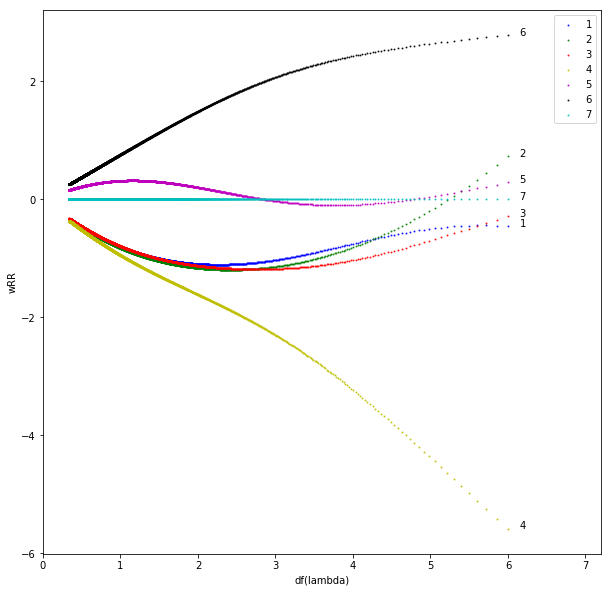

In [251]:
#testPlot =  sb.regplot(x = dfArray, y = wRRArray[:,0], color = "g", fit_reg=False)
colors = ['b', 'g', 'r', 'y', 'm', 'k', 'c']
plt.figure()
plt.rcParams['figure.figsize']=(10,10)
plt.xlim(0,7.2)
for k in range(wRRArray.shape[1]):
    plotvar = sb.regplot(x = dfArray, y = wRRArray[:,k], label = k+1, color = colors[k], scatter_kws={'s':1}, scatter = "False", fit_reg=False)
    plotvar.legend(loc="best")
    plt.text(6.15, wRRArray[0,k], k+1)
plt.xlabel("df(lambda)")
plt.ylabel("wRR")
plt.savefig("output.png")
plt.show()






When  $df(\lambda) = 6 $ or $\lambda = 0$ Feature 6 has a very positive impact on the dependent variable, while feature 4 has a very negative impact on it. The remaining features have very little impact on the dependent variable.

When $df(\lambda) = 0$ or $\lambda = \infty $ all of the coefficients are penalized therefore they have shrunk towards 0. 

In [252]:
# Calculate degrees of freedom for each lambda
dfArray = np.zeros(5001)
for lamb in range (0,5001):
    ss = s*s
    df  = np.sum(ss/(ss + lamb))
    dfArray[lamb] = df

print(dfArray)



[ 6.          5.85334102  5.72123953 ...,  0.33905616  0.33899936
  0.33894258]


[ 0.22165908  0.3225354   0.26346506  0.16932312 -0.28066007 -0.18199982]


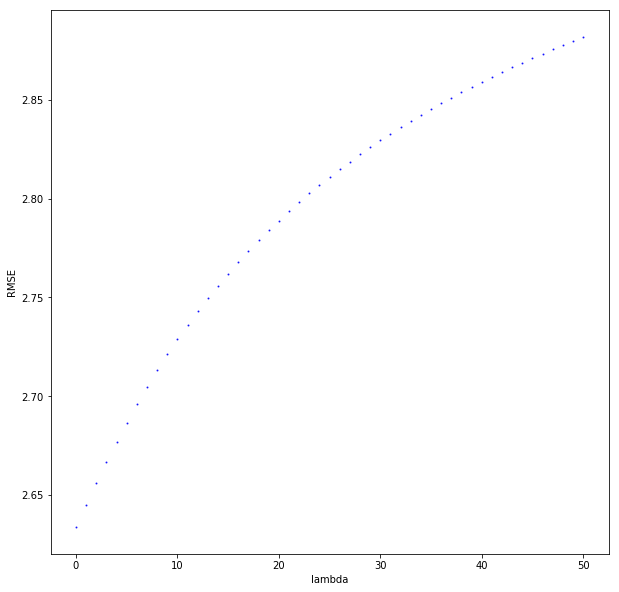

In [253]:
# Part (c) Predictions
x_test = np.genfromtxt('X_test.csv', delimiter=',')
x_test_norm = x_test[:,0:6] - x_train.mean(0)
print(x_test_norm.mean(0))
y_test = np.genfromtxt('y_test.csv')
y_test_norm = y_test - mean_y

def RMSE (X, y, w):
    y_pred = np.dot(X, w)    
    RMSE = np.sqrt(np.mean(np.power((y - y_pred),2)))
    return RMSE
    
#test = RMSE(x_test, y_test, wRRArray[0])
rmseArray = np.ndarray(51)

for lamb in range(0,51):
    rmseArray[lamb] = RMSE(x_test_norm, y_test_norm, wRRArray[lamb][0:6])
    
x_axis = np.array(range(0,51))
sb.regplot( x= x_axis, y = rmseArray, color = "b", scatter_kws={'s':1}, scatter = "False", fit_reg=False)

plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.savefig("partc.png")

plt.show()



In [254]:
# Part (d)

#Concatenating the linear and squared arrays, and then subtracting the means of the columns


x_squared = np.concatenate((x_train, np.power(x_train, 2)), axis = 1)
x_squared_mean = x_squared.mean(0)
x_squared_norm = x_squared - x_squared_mean
print(x_squared_norm.mean(0))

x_cubed = np.concatenate((x_squared, np.power(x_train, 3)), axis = 1)
x_cubed_mean = x_cubed.mean(0)
x_cubed_norm = x_cubed - x_cubed_mean
print(x_cubed_norm.mean(0))

wRRSquared = np.zeros((501,13))
wRRCubed = np.zeros((501,19))
for lamb in range (0, 501):
    wRRSquared[lamb] =  ridgeCalc(x_squared_norm, y_train_norm, lamb)
    wRRCubed[lamb] = ridgeCalc(x_cubed_norm, y_train_norm, lamb)
    

print(np.shape(wRRSquared))
print(np.shape(wRRCubed))



[  3.93336157e-17   6.34413157e-18   4.94842262e-17  -2.18872539e-17
   6.97854473e-18   6.34413157e-18   5.37601709e-15   8.80565462e-16
   8.99280650e-16   7.86355108e-16  -3.65104772e-16  -9.24022763e-16]
[  3.93336157e-17   6.34413157e-18   4.94842262e-17  -2.18872539e-17
   6.97854473e-18   6.34413157e-18   5.37601709e-15   8.80565462e-16
   8.99280650e-16   7.86355108e-16  -3.65104772e-16  -9.24022763e-16
  -1.78650745e-15  -5.56380339e-16  -3.11179653e-16   1.09119063e-16
  -1.30689110e-16   1.01188899e-16]
(501, 13)
(501, 19)


In [255]:
x_squared_test = np.concatenate((x_test[:,0:6], np.power(x_test[:,0:6], 2)), axis = 1)

#Substracting the original means of the columns

x_squared_test_norm =  x_squared_test - x_squared_mean
print(x_squared_test_norm.mean(0))

x_cubed_test = np.concatenate((x_squared_test, np.power(x_test[:,0:6], 3)), axis = 1)
x_cubed_test_norm  = x_cubed_test - x_cubed_mean
print(x_cubed_test_norm.mean(0))



[ 0.22165908  0.3225354   0.26346506  0.16932312 -0.28066007 -0.18199982
  0.08585731  0.25808854  0.37670108 -0.07598366  0.34342933  0.33891582]
[  2.21659076e-01   3.22535404e-01   2.63465057e-01   1.69323124e-01
  -2.80660074e-01  -1.81999823e-01   8.58573140e-02   2.58088542e-01
   3.76701079e-01  -7.59836628e-02   3.43429331e-01   3.38915821e-01
   3.50099719e-01   8.90415342e-01   1.12245419e+00  -1.45450731e-05
  -1.95533976e+00  -5.01182442e-01]


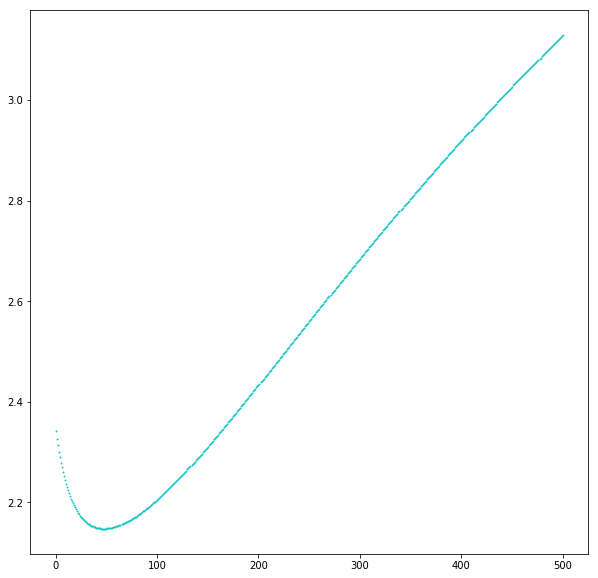

In [256]:

squaredRSMEArr = np.ndarray(501)

for lamb in range(0,501):
    squaredRSMEArr[lamb] = RMSE(x_squared_test_norm, y_test_norm, wRRSquared[lamb][0:12])

x_axis = np.array(range(0,501))
sb.regplot( x= x_axis, y = squaredRSMEArr, color = colors[k], scatter_kws={'s':1}, scatter = "False", fit_reg=False)
plt.show()


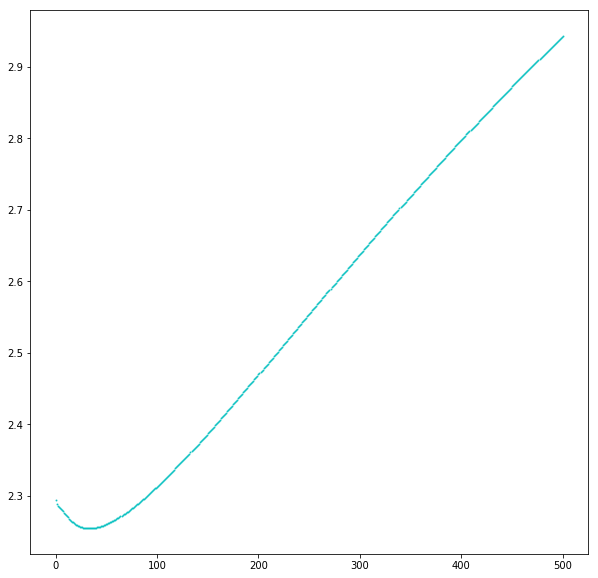

In [257]:
cubedRSMEArr = np.ndarray(501)

for lamb in range(0,501):
    cubedRSMEArr[lamb] = RMSE(x_cubed_test_norm, y_test_norm, wRRCubed[lamb][0:18])
    
x_axis = np.array(range(0,501))
sb.regplot( x= x_axis, y = cubedRSMEArr, color = colors[k], scatter_kws={'s':1}, scatter = "False", fit_reg=False)
plt.show()

2.14769806867
48
2.25440128607
33


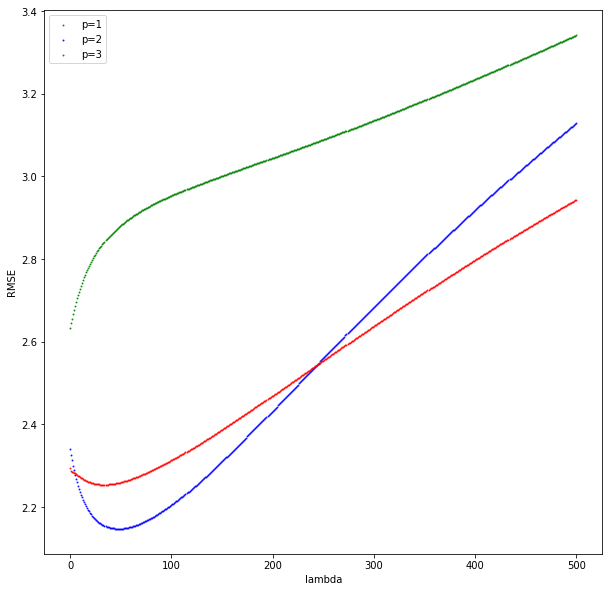

In [267]:
rmseArray = np.ndarray(501)

for lamb in range(0,501):
    rmseArray[lamb] = RMSE(x_test_norm, y_test_norm, wRRArray[lamb][0:6])

print(min(squaredRSMEArr))
print(np.argmin(squaredRSMEArr))

print(min(cubedRSMEArr))
print(np.argmin(cubedRSMEArr))




compvar =sb.regplot( x= x_axis, y = rmseArray, color = "g", label = "p=1",scatter_kws={'s':1}, scatter = "False", fit_reg=False)
compvar =sb.regplot( x= x_axis, y = squaredRSMEArr, color = "b", label = "p=2", scatter_kws={'s':1}, scatter = "False", fit_reg=False)
compvar = sb.regplot( x= x_axis, y = cubedRSMEArr, color = "r", label = "p=3", scatter_kws={'s':1}, scatter = "False", fit_reg=False)
compvar.legend(loc="best")

plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.savefig("comp.png")

plt.show()